In [1]:
import re

# Sample data
summary = [' flatten (Flatten)', ' dense (Dense)', ' dense_1 (Dense)']

# Extract text within parentheses
items_in_brackets = [re.search(r'\((.*?)\)', item).group(1) for item in summary]

# Output the list
print(items_in_brackets)


['Flatten', 'Dense', 'Dense']


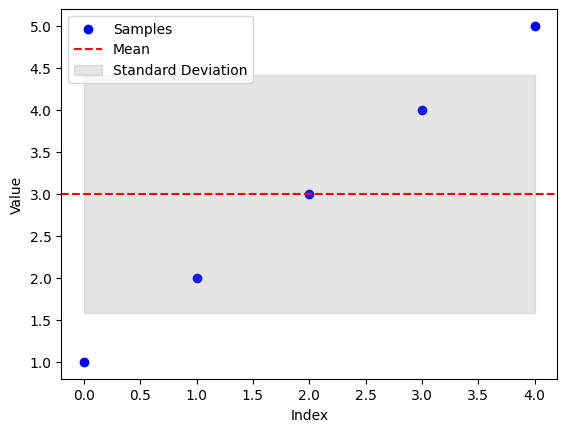

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
data = [1, 2, 3, 4, 5]

# Calculate mean and standard deviation
mean_value = np.mean(data)
std_deviation = np.std(data)

# Plot data points
plt.scatter(range(len(data)), data, color='blue', label='Samples')

# Plot mean line
plt.axhline(mean_value, color='red', linestyle='--', label='Mean')

# Plot shaded area representing standard deviation
plt.fill_between(range(len(data)), mean_value - std_deviation, mean_value + std_deviation, color='gray', alpha=0.2, label='Standard Deviation')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')

# Show plot
plt.show()


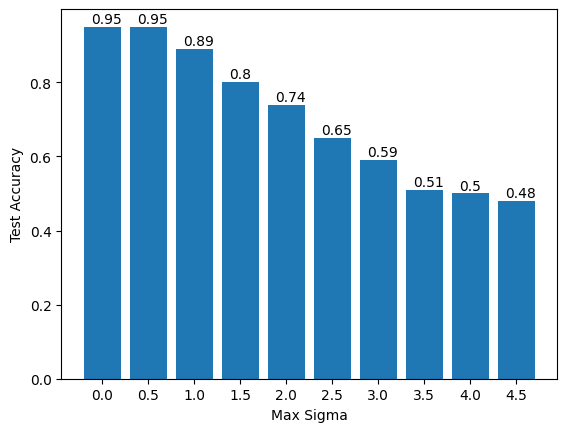

In [2]:
import matplotlib.pyplot as plt

# Sample data (replace with your own)
x = [i for i in range(1, 11)]
y = [0.95, 0.95, 0.89, 0.8, 0.74, 0.65, 0.59, 0.51, 0.5, 0.48]

# Create the bar chart
plt.bar(x, height=y)

# Add value labels above each bar
for i, v in enumerate(y):
    plt.text(x[i] - 0.25, v + 0.01, str(v))

# Customize other plot properties (e.g., labels, ticks, etc.)
plt.xlabel('Max Sigma')
plt.ylabel('Test Accuracy')
plt.xticks(x, [i / 2 for i in range(10)])

# Show the plot
plt.show()


2.967


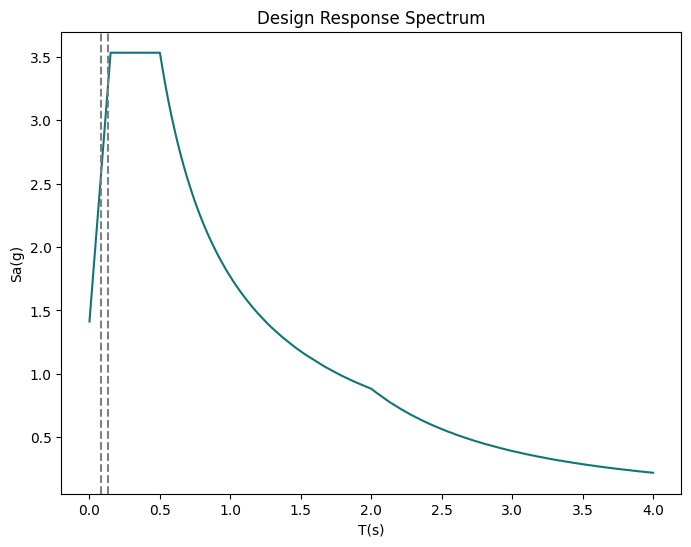

In [11]:
#####################################################################################################################
####################################################----INPUTS----################################################
#####################################################################################################################

'''VARIABLES INPUT'''
a_vault = 179.7
# Time period
Tp = 0.11
Tp = round(Tp,2)
# peak ground acceleration
ag = 0.18
ag = ag*9.81
# mass at intervals

m= [11736,43557]
# height at intervals
z = [3,5.82]
z = [round(i,5) for i in z]

'''VARIABLES TO BE INPUT'''
## Number of storeys
storey_no = 1
## type of ground: type_1 or type_2
type_ground_macro = 'type_1'
## type of ground: A,B,C,D
type_ground_micro = 'B'

'''CONSTANTS'''
# importance factor. 1 for residential
y1 = 1
# damping ratio
ξ = 1
# behaviour factor
q = 1.5

#####################################################################################################################
####################################################----FORMULA----################################################
#####################################################################################################################

time_list = [i * 0.01 for i in range(401)]
ground_param = {}
ground_param['type_1']={}
ground_param['type_2']={}


########################################### DEFINING S, TB, TC, TD

# # dataframe version 
# ground_param['type_1'] = {
#     "Type": ["A", "B", "C", "D", "E"],
#     "S": [1.0, 1.2, 1.15, 1.35, 1.4],
#     "TB(s)": [0.15, 0.15, 0.20, 0.20, 0.15],
#     "TC(s)": [0.4, 0.5, 0.6, 0.8, 0.5],
#     "TD(s)": [2.0, 2.0, 2.0, 2.0, 2.0]
# }
# ground_param['type_1'] = pd.DataFrame(ground_param["type_1"])

# dict version
ground_param['type_1'] = {
    'A': {'S': 1.00, 'TB(s)': 0.15, 'TC(s)': 0.4, 'TD(s)': 2.0},
    'B': {'S': 1.20, 'TB(s)': 0.15, 'TC(s)': 0.5, 'TD(s)': 2.0},
    'C': {'S': 1.15, 'TB(s)': 0.20, 'TC(s)': 0.6, 'TD(s)': 2.0},
    'D': {'S': 1.35, 'TB(s)': 0.20, 'TC(s)': 0.8, 'TD(s)': 2.0},
    'E': {'S': 1.40, 'TB(s)': 0.15, 'TC(s)': 0.5, 'TD(s)': 2.0}
}

# # dataframe version 
# ground_param['type_2'] = {
#     "Type": ["A", "B", "C", "D", "E"],
#     "S": [1.0, 1.35, 1.5, 1.8, 1.6],
#     "TB(s)": [0.05, 0.05, 0.10, 0.10, 0.05],
#     "TC(s)": [0.25, 0.25, 0.25, 0.30, 0.25],
#     "TD(s)": [1.2, 1.2, 1.2, 1.2, 1.2]
# }
# ground_param['type_2'] = pd.DataFrame(ground_param["type_2"])

# dict version
ground_param['type_2'] = {
    'A': {'S': 1.0, 'TB(s)': 0.05, 'TC(s)': 0.25, 'TD(s)': 1.2},
    'B': {'S': 1.35, 'TB(s)': 0.05, 'TC(s)': 0.25, 'TD(s)': 1.2},
    'C': {'S': 1.5, 'TB(s)': 0.1, 'TC(s)': 0.25, 'TD(s)': 1.2},
    'D': {'S': 1.8, 'TB(s)': 0.1, 'TC(s)': 0.3, 'TD(s)': 1.2},
    'E': {'S': 1.6, 'TB(s)': 0.05, 'TC(s)': 0.25, 'TD(s)': 1.2}
}


########################################### RULES FOR S, TB, TC, TD
Sf= ground_param[type_ground_macro][type_ground_micro]['S']
Tb = ground_param[type_ground_macro][type_ground_micro]['TB(s)']
Tc = ground_param[type_ground_macro][type_ground_micro]['TC(s)']
Td = ground_param[type_ground_macro][type_ground_micro]['TD(s)']


########################################### FINDING Sa(Spectral acceleration for given Time period)
if 0<=Tp<=Tb:
    Sa = ag * Sf * (2/3 + (Tp/Tb)*((2.5/q)-(2/3)))
elif Tb<=Tp<=Tc:
    Sa = ag * Sf * (2.5/q)
elif Tc<=Tp<=Td:
    Sa= ag * Sf * (2.5/q) * (Tc/Tp)
elif Td<=Tp:
    Sa = ag * Sf * (2.5/q) * ((Tc*Td)/(Tp**2))


########################################### FINDING BASE SHEAR

lamda  = 1.0
if Tp <= 2*Tc and storey_no > 2:
    lamda = 0.85

# Base shear in Newtons
Fb = Sa*m[-1]*lamda


########################################### DISTRIBUTION OF HORIZONTAL SEISMIC FORCES

# Force per interval
Fx = []

zjmj = 0
for zi,mi in zip (z,m):
    addition = zi*mi
    zjmj+= addition
#zjmj = sum(zjmj)

for zi,mi in zip (z,m):
    Fi = Fb * (zi * mi)/zjmj
    Fx.append(round(Fi,5))




## Check whether base shear is distributed properly
#if Fb - sum(Fx) > 1 or Fb - sum(Fx) < -1:
#    print('Base shear not distributed properly!')


#####################################################################################################################
####################################################----PLOT----################################################
#####################################################################################################################

colour_teal = (15/255, 117/255, 118/255)  # Normalize RGB values to range [0, 1]
# Design spectrum graph 

design_response_spectrum = {}
design_response_spectrum['Sa(g)'] = []
design_response_spectrum['T(s)'] = []

for t in time_list:
    if 0<=t<=Tb:
        Sa = ag * Sf * (2/3 + (t/Tb)*((2.5/q)-(2/3)))
    elif Tb<=t<=Tc:
        Sa = ag * Sf * (2.5/q)
    elif Tc<=t<=Td:
        Sa= ag * Sf * (2.5/q) * (Tc/t)
    elif Td<=t:
        Sa = ag * Sf * (2.5/q) * ((Tc*Td)/(t**2))

    design_response_spectrum['Sa(g)'].append(round(Sa,3))
    design_response_spectrum['T(s)'].append(round(t,2))

# Finding the spectral acceleration from the given time period
print(design_response_spectrum['Sa(g)'][design_response_spectrum['T(s)'].index(Tp)])

plt.figure(figsize=(8, 6))
plt.plot(design_response_spectrum['T(s)'], design_response_spectrum['Sa(g)'], linestyle='-', color=colour_teal)
plt.xlabel('T(s)')
plt.ylabel('Sa(g)')
plt.axvline(0.08, linestyle='--', color='gray', label='y = 0.08')
plt.axvline(0.13, linestyle='--', color='gray', label='y = 0.08')
plt.title('Design Response Spectrum')
plt.grid(False)
plt.show()


#####################################################################################################################
####################################################----END----################################################
#####################################################################################################################

#end_time = time.time()
#print('Elapsed time = ', end_time - start_time, 'seconds')

#print('-----------------------------------SEISMIC ANALYSIS.PY STARTS HERE--------------------------------------')

f___d-27-relu___d-27-relu________d-27-relu___d-27-relu___d-27-sigmoid________ld-4___β-0.2___epochs-600___batch-64___val-0.2___mse___lr-0.0001


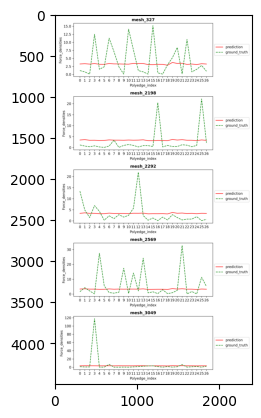

----------------------------------------------------
f___d-32-relu___d-32-relu________d-32-relu___d-32-relu___d-27-sigmoid________ld-4___β-0.2___epochs-600___batch-64___val-0.2___mse___lr-0.001


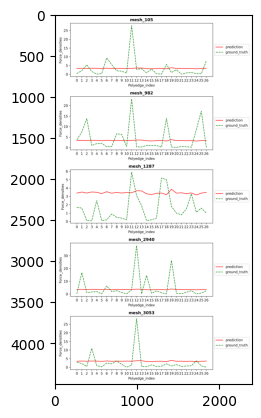

----------------------------------------------------
f___d-64-relu___d-64-relu________d-64-relu___d-64-relu___d-27-sigmoid________ld-4___β-0.2___epochs-600___batch-64___val-0.2___mse___lr-0.001


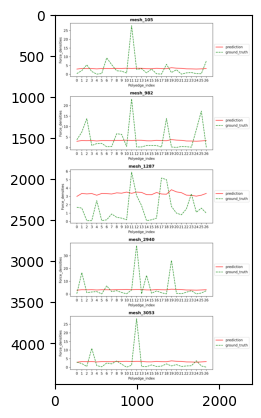

----------------------------------------------------


In [2]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

mainpath  = 'D:/OneDrive - Delft University of Technology/Thesis/python_others/my_code/02_vae/DATASETS/DATASET_24/vae_results'
filepath = os.path.join(mainpath, )

# # best in interstory drift
# best_list = ['f___d-128-relu___d-64-relu___d-3-relu________epochs-10000___batch-64___val-0.2___lr-1e-06 ',
# 'f___d-128-relu___d-64-relu___d-3-relu________epochs-20000___batch-64___val-0.2___lr-1e-07',
# 'f___d-128-relu___d-64-relu___d-3-relu________epochs-40000___batch-64___val-0.2___lr-1e-07'
# ]


# # best in utilization/interstory drift
# best_list = ['f___d-128-relu___d-64-relu___d-3-relu________epochs-40000___batch-64___val-0.2___lr-1e-07',
# 'f___d-256-relu___d-128-relu___d-3-relu________epochs-40000___batch-32___val-0.2___lr-1e-07',
# 'f___d-256-relu___d-128-relu___d-64-relu___d-3-sigmoid________epochs-40000___batch-64___val-0.2___lr-1e-07'
# ]

# fig, axs = plt.subplots(1,3,figsize =(12,8))

file_names = os.listdir(filepath)
for i, file in enumerate(file_names):
    if file[0] == 'f':
    # if file in best_list:
        # row = i//3
        # col = i%3
        img = mpimg.imread(os.path.join(filepath,file,'plot_prediction_ground_truth.png'))
        # axs[row,col].imshow(img)
        plt.imshow(img)
        print(file)
        plt.show()
        print('----------------------------------------------------')

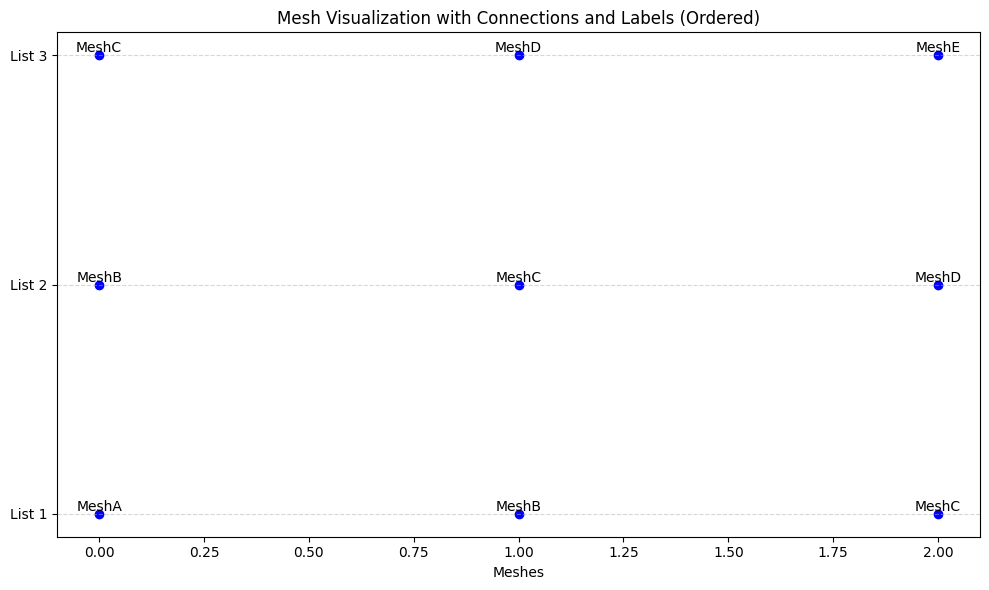

In [13]:
import matplotlib.pyplot as plt

# Example mesh lists (replace with your actual data)
list1 = ["MeshA", "MeshB", "MeshC"]
list2 = ["MeshB", "MeshC", "MeshD"]
list3 = ["MeshC", "MeshD", "MeshE"]

# Combine all unique meshes
all_meshes = set(list1 + list2 + list3)

# Create a dictionary to store mesh positions
mesh_positions = {mesh: idx for idx, mesh in enumerate(all_meshes)}

# Create a scatter plot
plt.figure(figsize=(10, 6))
for list_index, mesh_list in enumerate([list1, list2, list3]):
        for i, mesh in enumerate(mesh_list):
            x=list_index
            y=i
            position = [x,y]
            plt.scatter(x, y, label=mesh, color='b')
            plt.text(x, y, mesh, ha='center', va='bottom', fontsize=10)

# Add connections (lines) between repeated meshes
for mesh in all_meshes:
    if mesh in list1 and mesh in list2:
        plt.plot(list_1[x],y, color='gray', linestyle='--')
    if mesh in list2 and mesh in list3:
        plt.plot(x,y, color='gray', linestyle='--')


for list_index, mesh_list in enumerate([list1, list2, list3]):
        for i, mesh in enumerate(mesh_list):
             if mesh in mesh_list[i+1]:
                   

plt.yticks(range(3), ["List 1", "List 2", "List 3"])
plt.xlabel("Meshes")
plt.title("Mesh Visualization with Connections and Labels (Ordered)")
# plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


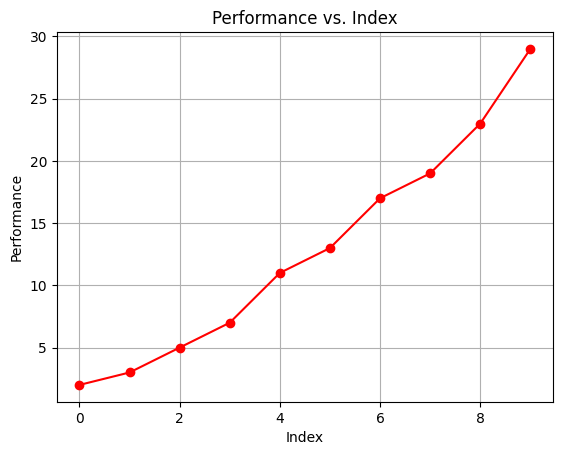

In [16]:
import matplotlib.pyplot as plt

# Assuming 'performance' is a list of 10 values
performance = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

# Create a plot with index on the x-axis and performance values on the y-axis
plt.plot(range(len(performance)), performance, marker='o', color='r')
plt.xlabel('Index')
plt.ylabel('Performance')
plt.title('Performance vs. Index')
plt.grid(True)
plt.show()


<class 'list'>
f___d-256-relu___d-128-relu___d-1-relu________epochs-1000___batch-128___val-0.2___lr-1e-06___UTIL


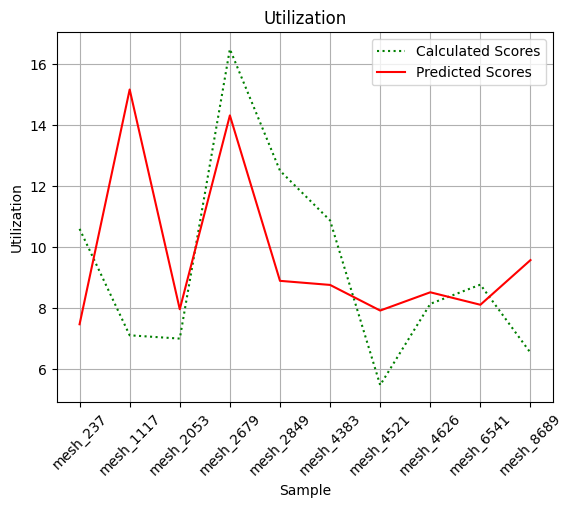

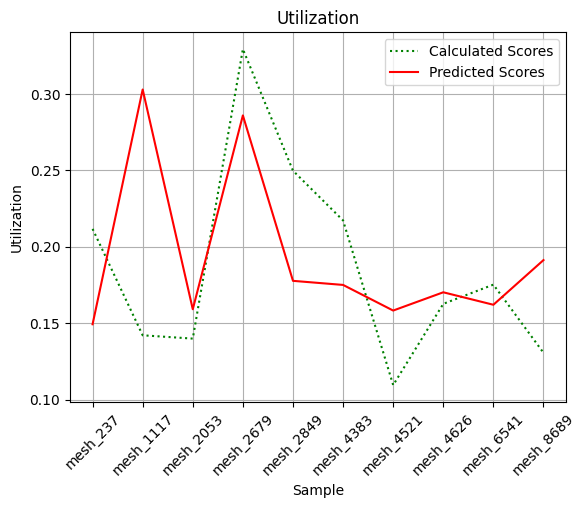

f___d-256-relu___d-128-relu___d-1-relu________epochs-1000___batch-128___val-0.2___lr-1e-06___UTIL___thick-norm


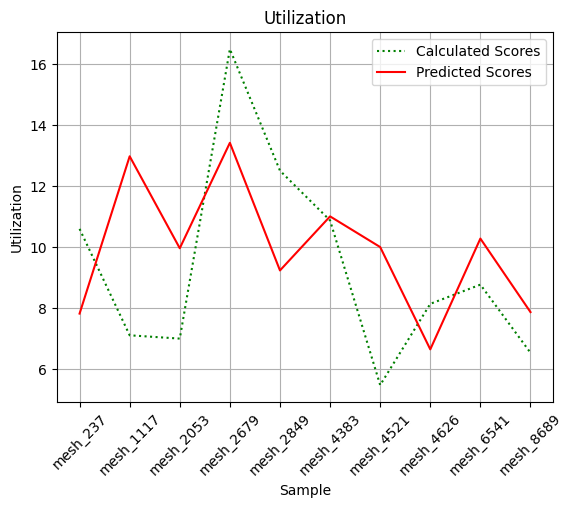

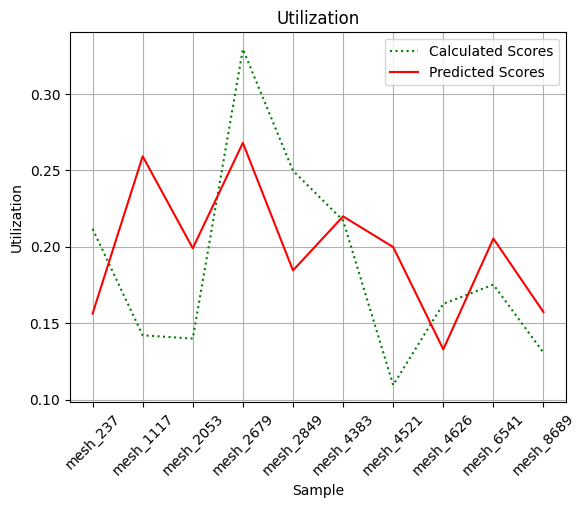

In [13]:
# GENERATING AND SAVING GROUND_TRUTH_VS_PREDICTIONS GRAPHS FROM CSVS


import os
import pandas as  pd
import matplotlib.pyplot as plt

main_path = 'D:/OneDrive - Delft University of Technology/Thesis/python_others/my_code/02_vae/DATASETS/DATASET_24/surr_results'
BOOLEAN_model_type = 'Utilization'

files = os.listdir(main_path)
print(type(files))
# files = 'f___d-256-relu___d-128-relu___d-1-relu________epochs-1000___batch-128___val-0.2___lr-1e-06___UTIL'
additional_path=[]
for file in files: 
    if 'UTIL' in file:
        additional_path.append(file)

for file in additional_path:
    total_path = os.path.join(main_path,file)
    csv_path = os.path.join(total_path,'ground_truth_vs_prediction.csv')

    if os.path.exists(csv_path):
        csv = pd.read_csv(csv_path)
        print(file)

        calculated_scores = csv['Calculated_score']
        predicted_scores = csv['Predicted_score']
        calculated_scores_normalized = csv['Calculated_score_normalized']
        predicted_scores_normalized = csv['Predicted_score_normalized']   
        meshes_to_test = csv['test_mesh']


        plt.plot(calculated_scores, color='green', linestyle='dotted', label='Calculated Scores')
        plt.plot(predicted_scores, color='red', linestyle='solid', label='Predicted Scores')
        plt.xlabel('Sample')
        plt.ylabel(f"{BOOLEAN_model_type}")
        plt.title(f"{BOOLEAN_model_type}")
        plt.xticks(range(len(meshes_to_test)),meshes_to_test, rotation=45)
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(total_path, f'plot_prediction_ground_truth_NOT_normalized.png'), dpi=300)
        plt.show()


        plt.plot(calculated_scores_normalized, color='green', linestyle='dotted', label='Calculated Scores')
        plt.plot(predicted_scores_normalized, color='red', linestyle='solid', label='Predicted Scores')
        plt.xlabel('Sample')
        plt.ylabel(f"{BOOLEAN_model_type}")
        plt.title(f"{BOOLEAN_model_type}")
        plt.xticks(range(len(meshes_to_test)),meshes_to_test, rotation=45)
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(total_path, f'plot_prediction_ground_truth.png'), dpi=300)
        plt.show()
    

f___d-128-relu___d-64-relu___d-3-relu________epochs-20000___batch-64___val-0.2___lr-1e-07


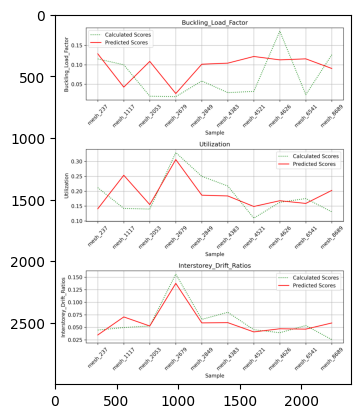

----------------------------------------------------
f___d-128-relu___d-64-relu___d-3-relu________epochs-40000___batch-64___val-0.2___lr-1e-07


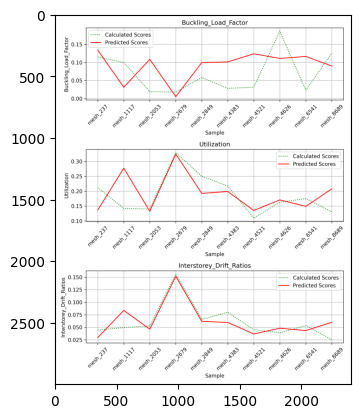

----------------------------------------------------


In [1]:
# VISUALIZING GROUND_TRUTH VS PREDICTION GRAPHS FROM SURROGATE MODEL

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

mainpath  = 'D:/OneDrive - Delft University of Technology/Thesis/python_others/my_code/02_vae/DATASETS/DATASET_24/surr_results'
filepath = os.path.join(mainpath, )



################################################################# BEST LIST (COMBINED)
# best in interstory drift
best_list = ['f___d-128-relu___d-64-relu___d-3-relu________epochs-10000___batch-64___val-0.2___lr-1e-06 ',
'f___d-128-relu___d-64-relu___d-3-relu________epochs-20000___batch-64___val-0.2___lr-1e-07',
'f___d-128-relu___d-64-relu___d-3-relu________epochs-40000___batch-64___val-0.2___lr-1e-07'
]


# # best in utilization/interstory drift
# best_list = ['f___d-128-relu___d-64-relu___d-3-relu________epochs-40000___batch-64___val-0.2___lr-1e-07',
# 'f___d-256-relu___d-128-relu___d-3-relu________epochs-40000___batch-32___val-0.2___lr-1e-07',
# 'f___d-256-relu___d-128-relu___d-64-relu___d-3-sigmoid________epochs-40000___batch-64___val-0.2___lr-1e-07'
# ]

# fig, axs = plt.subplots(1,3,figsize =(12,8))

file_names = os.listdir(filepath)
for i, file in enumerate(file_names):
    # if file[0] == 'f':
    if file in best_list:
        # row = i//3
        # col = i%3
        img = mpimg.imread(os.path.join(filepath,file,'plot_prediction_ground_truth.png'))
        # axs[row,col].imshow(img)
        plt.imshow(img)
        print(file)
        plt.show()
        print('----------------------------------------------------')



f___d-256-relu___d-128-relu___d-1-relu________epochs-1000___batch-128___val-0.2___lr-1e-06___UTIL


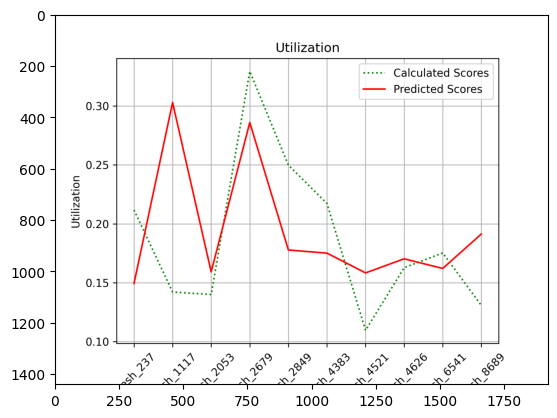

----------------------------------------------------
f___d-256-relu___d-128-relu___d-1-relu________epochs-1000___batch-128___val-0.2___lr-1e-06___UTIL___thick-norm


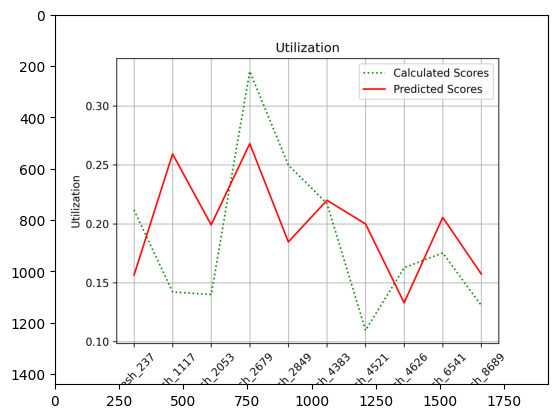

----------------------------------------------------
f___d-256-relu___d-128-relu___d-1-relu________epochs-1000___batch-128___val-0.2___lr-5e-06________UTIL___thick-separate


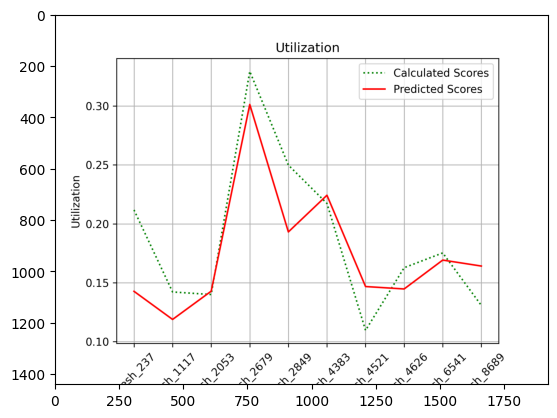

----------------------------------------------------
f___d-256-relu___d-128-relu___d-1-relu________epochs-1000___batch-128___val-0.2___lr-5e-06________UTIL___thick-together


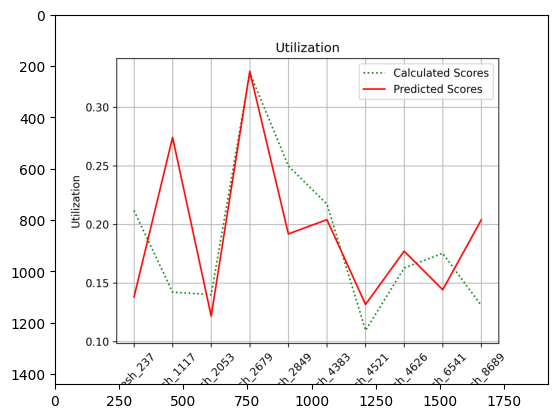

----------------------------------------------------


In [16]:
# VISUALIZING GROUND_TRUTH VS PREDICTION GRAPHS FROM SURROGATE MODEL

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

mainpath  = 'D:/OneDrive - Delft University of Technology/Thesis/python_others/my_code/02_vae/DATASETS/DATASET_24/surr_results'
filepath = os.path.join(mainpath, )



################################################################# BEST LIST (separate)
# best in interstory drift
best_list = ['f___d-128-relu___d-64-relu___d-3-relu________epochs-10000___batch-64___val-0.2___lr-1e-06 ',
'f___d-128-relu___d-64-relu___d-3-relu________epochs-20000___batch-64___val-0.2___lr-1e-07',
'f___d-128-relu___d-64-relu___d-3-relu________epochs-40000___batch-64___val-0.2___lr-1e-07'
]


# # best in utilization/interstory drift
# best_list = ['f___d-128-relu___d-64-relu___d-3-relu________epochs-40000___batch-64___val-0.2___lr-1e-07',
# 'f___d-256-relu___d-128-relu___d-3-relu________epochs-40000___batch-32___val-0.2___lr-1e-07',
# 'f___d-256-relu___d-128-relu___d-64-relu___d-3-sigmoid________epochs-40000___batch-64___val-0.2___lr-1e-07'
# ]

# fig, axs = plt.subplots(1,3,figsize =(12,8))

file_names = os.listdir(filepath)
for i, file in enumerate(file_names):
    # if file[0] == 'f':
    if 'UTIL' in file:
        # row = i//3
        # col = i%3
        img = mpimg.imread(os.path.join(filepath,file,'plot_prediction_ground_truth.png'))
        # axs[row,col].imshow(img)
        plt.imshow(img)
        print(file)
        plt.show()
        print('----------------------------------------------------')



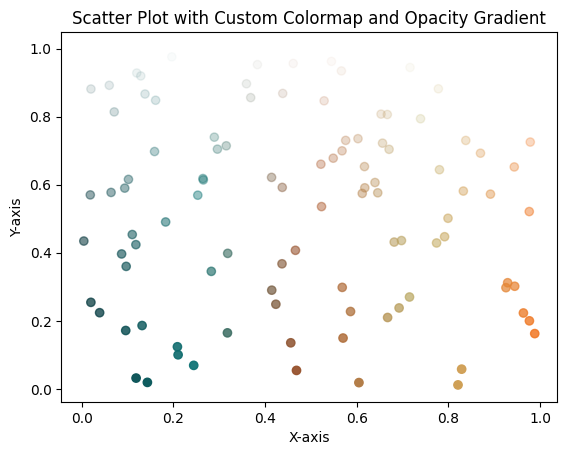

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the custom colormap
colors = [
    (11/255, 58/255, 64/255),
    (15/255, 117/255, 118/255),
    (170/255, 80/255, 38/255),
    (190/255, 181/255, 111/255),
    (241/255, 118/255, 34/255)
]

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# Generate some example data
np.random.seed(0)  # For reproducibility
x = np.random.rand(100)
y = np.random.rand(100)

# Normalize x to range [0, 1] to map it to the colormap
x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))

# Create an array to hold the RGBA values
colors_rgba = cmap(x_norm)

# Adjust the alpha channel based on the y values
y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
colors_rgba[:, 3] = 1 - y_norm  # Decrease opacity as y increases

# Plot the data
plt.scatter(x, y, color=colors_rgba)
plt.title('Scatter Plot with Custom Colormap and Opacity Gradient')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


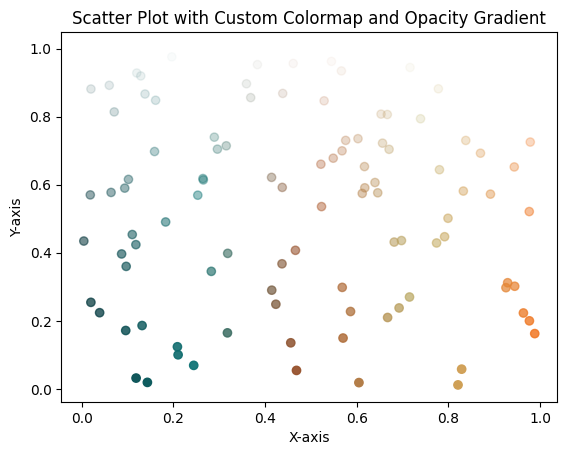

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def plot_custom_colormap(x, y, colors):
    """
    Plots a scatter plot with a custom colormap and opacity gradient.
    
    Parameters:
    - x: array-like, the x-coordinates of the points.
    - y: array-like, the y-coordinates of the points.
    - colors: list of tuples, colors for the custom colormap.
    """
    # Create a custom colormap
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
    
    # Normalize x to range [0, 1] to map it to the colormap
    x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))

    # Create an array to hold the RGBA values
    colors_rgba = cmap(x_norm)

    # Normalize y to range [0, 1] to map it to opacity
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    colors_rgba[:, 3] = 1 - y_norm  # Decrease opacity as y increases

    # Plot the data
    plt.scatter(x, y, color=colors_rgba)
    plt.title('Scatter Plot with Custom Colormap and Opacity Gradient')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# Define the colors for the custom colormap
colors = [
    (11/255, 58/255, 64/255),
    (15/255, 117/255, 118/255),
    (170/255, 80/255, 38/255),
    (190/255, 181/255, 111/255),
    (241/255, 118/255, 34/255)
]

# Example usage with random data
np.random.seed(0)  # For reproducibility
x = np.random.rand(100)
y = np.random.rand(100)

# Call the function
plot_custom_colormap(x, y, colors)


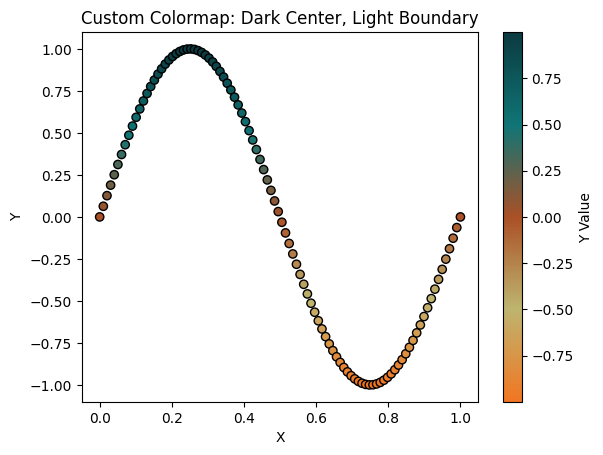

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def custom_colormap_dark_center_light_boundary(colors, n=256):
    """
    Creates a custom colormap with dark center and light boundary.

    Parameters:
    - colors: list of tuples, colors for the custom colormap.
    - n: int, number of levels in the colormap.

    Returns:
    - cmap: LinearSegmentedColormap
    """
    if len(colors) < 2:
        raise ValueError("At least two colors are required for the colormap.")

    # Create a custom colormap
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n)

    # Adjust the colormap to have a dark center and light boundary
    cmap = cmap.reversed()

    return cmap

# Example usage
colors = [(11/255, 58/255, 64/255), (15/255, 117/255, 118/255), (170/255, 80/255, 38/255),
          (190/255, 181/255, 111/255), (241/255, 118/255, 34/255)]

# Create a custom colormap
cmap = custom_colormap_dark_center_light_boundary(colors)

# Generate some illustrative fake data (you can replace this with your actual data)
x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x)

# Plot the data using the custom colormap
plt.scatter(x, y, c=y, cmap=cmap, edgecolor="k")

# Add colorbar for reference
plt.colorbar(label="Y Value")

# Customize the plot (add labels, title, etc.)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Custom Colormap: Dark Center, Light Boundary")

# Show the plot
plt.show()


In [2]:
import numpy as np
np.linspace(1,3,10)

array([1.        , 1.22222222, 1.44444444, 1.66666667, 1.88888889,
       2.11111111, 2.33333333, 2.55555556, 2.77777778, 3.        ])

In [5]:
# def custom_round(value):
#     decimal_part = value - int(value)
#     if decimal_part < 0.25:
#         return int(value)
#     elif decimal_part >= 0.25 and decimal_part <= 0.75:
#         return round(value)
#     else:
#         return int(value) + 1

# Example list of values
original_values = [1.0, 1.1, 1.2, 1.3, 1.5, 1.9, 1.25]

# Round each value
# rounded_values = [custom_round(val) for val in original_values]

rounded_values = original_values

max_height = 10
min_height = 1
increment = 1

mid_height = (10-1)

# Adjust to 1, 5, or 10
for i in range(len(rounded_values)):
    if rounded_values[i] not in [1.1, 1.3, 10]:
        if rounded_values[i] < 3:
            rounded_values[i] = 1.1
        elif rounded_values[i] < 7:
            rounded_values[i] = 5
        else:
            rounded_values[i] = 1

print("Original values:", original_values)
print("Rounded values:", rounded_values)


Original values: [1, 5, 5, 10]
Rounded values: [1, 5, 5, 10]


In [4]:
import numpy as np
def get_condition_vector(condition):
    # Example for a one-hot encoded condition vector
    # Assuming we have 10 classes and 'condition' is an integer representing the class
    condition_vector = np.zeros((1, 10))
    condition_vector[0, condition] = 1
    return condition_vector

get_condition_vector(2)
np.zeros((1,5))

array([[0., 0., 0., 0., 0.]])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a function to get the conditioning vector
# This could be a one-hot encoded vector or any other type of vector
def get_condition_vector(condition):
    # Example for a one-hot encoded condition vector
    # Assuming we have 10 classes and 'condition' is an integer representing the class
    condition_vector = np.zeros((1, 10))
    condition_vector[0, condition] = 1
    return condition_vector

# Example usage
BOOLEAN_plot_vae = True  # Flag to control the plotting
BOOLEAN_model_type = 'conditional'  # Example model type

# Conditional VAE model components
latent_dim = 2  # Dimension of the latent space
num_conditions = 10  # Number of possible conditions (e.g., classes)

# Assuming you have the decoder model of your CVAE
# Replace this with your actual decoder model
# decoder = vae.decoder

if BOOLEAN_plot_vae:
    # Single decoded image with random input latent vector (of size 1x2)
    # Latent space range is about -5 to 5 so pick random values within this range
    sample_vector = np.array([[0.9502745, -1.4800116]])
    print("Latent vector shape:", sample_vector.shape)

    # Get the condition vector
    condition = 3  # Example condition (e.g., class label 3)
    condition_vector = get_condition_vector(condition)
    print("Condition vector shape:", condition_vector.shape)

    # Concatenate the latent vector and the condition vector
    conditioned_vector = np.concatenate([sample_vector, condition_vector], axis=1)
    print("Conditioned vector shape:", conditioned_vector.shape)

    # # Predict the decoded sample using the conditioned vector
    # decoded_example = decoder.predict(conditioned_vector)
    # print("Decoded example shape:", decoded_example.shape)

    # # Reshape the decoded example (assuming the output shape is 28x28 for an image dataset like MNIST)
    # decoded_example_reshaped = decoded_example.reshape(28, 28) * np.max(dataset)
    # print("Decoded example reshaped:", decoded_example_reshaped)

    # # Plot the decoded example
    # plt.imshow(decoded_example_reshaped, cmap='gray')
    # plt.title(f'Decoded Sample for Condition {condition}')
    # plt.show()


Latent vector shape: (1, 2)
Condition vector shape: (1, 10)
Conditioned vector shape: (1, 12)


In [13]:
import numpy as np

# Generate random values between -2 and 2
random_values = np.random.uniform(low=-2, high=2, size=(1, 2))

print("Random array with shape (1, 2):")
print(random_values)


Random array with shape (1, 2):
[[-0.00636051  0.47882405]]


In [1]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Step 1: Import the necessary module
from sklearn.preprocessing import OneHotEncoder

# Step 2: Create your labels list
labels = ['a', 'b', 'c']

# Step 3: Reshape the data
labels = np.array(labels).reshape(-1, 1)

# Step 4: Fit and transform the labels
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(labels)

# Step 5: Print the one-hot encoded labels
print(one_hot_encoded)


ModuleNotFoundError: No module named 'sklearn'

In [2]:
def contains_all_elements(my_str, my_list):
    return all(elem in my_str for elem in my_list)

# Example usage:
my_string = "tomato"
my_list = ["t", "o", "m", "a"]
result = contains_all_elements(my_string, my_list)
print(result)  # This will print True

my_string = "potato"
result = contains_all_elements(my_string, my_list)
print(result)  # This will print False


condition = all(elem in my_string for elem in my_list)

True
False


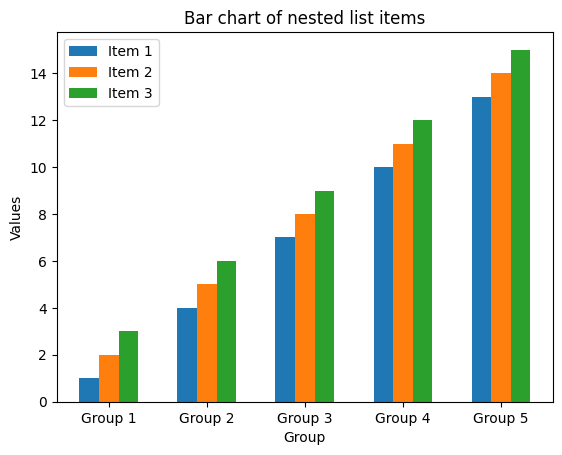

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample nested list with 5 sublists, each containing 3 items
data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
]

# Convert the nested list to a numpy array for easier manipulation
data_array = np.array(data)

# Number of sublists
n_groups = len(data)

# Number of items in each sublist
n_items = len(data[0])

# Create an array for the group locations
index = np.arange(n_groups)

# Define bar width
bar_width = 0.2

# Create a figure and axis
fig, ax = plt.subplots()

# Plot each set of items in the nested list as bars
for i in range(n_items):
    plt.bar(index + i * bar_width, data_array[:, i], bar_width, label=f'Item {i+1}', color = colour_list)

# Add labels, title, and legend
plt.xlabel('Group')
plt.ylabel('Values')
plt.title('Bar chart of nested list items')
plt.xticks(index + bar_width, [f'Group {i+1}' for i in range(n_groups)])
plt.legend()

# Display the plot
plt.show()


IndexError: Replacement index 12 out of range for positional args tuple

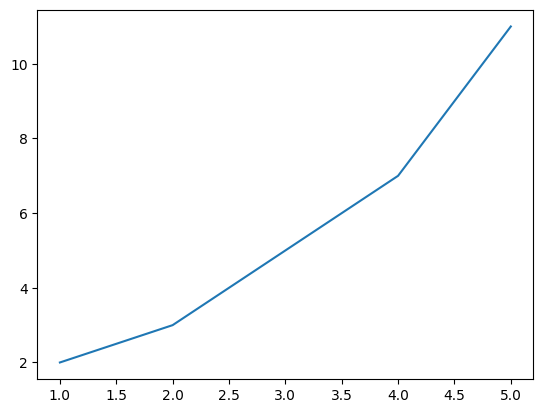

In [1]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Define the learning rate
learning_rate = 0.01

# Plot
plt.plot(x, y)

# Add title with multiple lines and different font sizes
plt.title(r'Optimization of Utilization, Mass and Height' + '\n' + r'\fontsize{12}{14}\selectfont Learning\_rate = {:.2f}'.format(learning_rate))

# Show plot
plt.show()


In [4]:
print(index)

[0 1 2 3 4]
